# Introduction to Data Science and Machine Learning

<p align="center">
    <img width="699" alt="image" src="https://user-images.githubusercontent.com/49638680/159042792-8510fbd1-c4ac-4a48-8320-bc6c1a49cdae.png">
</p>

---

## Performance metrics

We are now to a crucial question.

> To what extent can we trust our trained models?

Actually the question is even more basic: How can we measure model performances?

### Train test and validation sets.

We will see later that one cannot have a reliable measure of a machine learning algorithm performances only looking at the data the model has been trained on. This because even from a statistic point of view, these data are related by the equations necessary to estimate model parameters, hence they are no more _statistically independent_. 
In order to measure model performances we split the starting dataset into three pieces.

* __Training Set__: this data set is used to adjust the weights of the model. Namely, to train the model.

* __Validation Set__: this data set is used to tune hyperparameters. You are not adjusting the weights of the model with this data set, you are just verifying that any increase in accuracy over the training data set actually yields an increase in accuracy over a data set that has not been shown to the algorithm before, or at least it has not trained on it (i.e. validation data set). You can compare performances of different choices of hyperparameters over this dataset and pick the best ones. For this reason this is also called the __development or dev set__. 

* __Test Set__: this data set is used only for testing the final solution in order to confirm and measure the actual predictive power of the network.

There is real handy method in `sklearn` o perform such a split, called [`train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

We can describe the simplest version of our strategy as follows.

Split the full dataset into training set, test set and validation set. In a typical example, the splitting is $70\%$-$10\%$-$20\%$.

Train the algorithm on the training set, getting weights from this procedure. Hence, adjust other parameters of the model on the validation set (i.e. determine thresholds, number of classes, etc.) Finally, compute on the test set the accuracy of your model.

We are going to give more details about validation procedures later. Now we prefer rather to focus on different evaluation metrics.

---
## Regression metrics

Consider a regression problem where the input is $x$ and the output is $y$. The below image shows the linear regression line drawn to predict the $y$.

<p align="center">
    <img width="398" alt="Schermata 2022-08-03 alle 11 39 26" src="https://user-images.githubusercontent.com/49638680/182577348-050aa6ba-82b3-4839-b3a9-77ee58326fb7.png">
</p>

The actual and predicted values of $y$ show that the model is committing some errors, so with the help of a proper metric, we need to determine how good our model is.

Let's discuss various commonly used regression metrics.

### Mean absolute error
The MAE is the average of the absolute errors.

$$\text{MAE} = \frac{1}{n} \sum_{i=1}^n |y_i - \hat{y}_i|$$

<p align="center">
    <img width="998" alt="MAE" src="https://user-images.githubusercontent.com/49638680/182580254-3d6c6e3f-2e90-47ef-9da7-dbe1f1ce342c.png">
</p>

#### Advantages

* Simple and easy to interpret. The result will have the same unit as that of the output. _E.g_: if the output column is having the unit meters, then if the MAE comes to be $1.2$, then we can interpret that the result is $+1.2\text{m}$ or $-1.2\text{m}$.

* MAE is comparatively robust to the outliers (When compared to some of the other regression metrics MAE is less affected by the outliers).

#### Disadvantages

* MAE uses the modulus function, but the modulus function is not differentiable at all the points, so it can not be used as a _loss function_ in many cases.

### Mean squared error

The MSE is the average of the squared errors.

$$\text{MSE} = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2$$

<p align="center">
    <img width="1065" alt="MSE" src="https://user-images.githubusercontent.com/49638680/182579737-21e99510-210b-467b-8812-32ed9121e2ca.png">
</p>

#### Advantages

* The square function is differentiable at all the points and hence it can be used as a loss function, and it is in many cases.

#### Disadvantages

* As the MSE uses the square function the result will have the unit which is a square of the output. So, it is difficult to interpret the result. The MSE in the previous example will be having the unit meter squared.

* As it uses a square function, if there are outliers in the data, the difference gets squared, as a result, MSE is not robust to the outliers.

### Root mean squared error

The RMSE is the square root of the average of the squared errors. 
In other words it is the square root of the MSE.

$$\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2}$$

<p align="center">
    <img width="1055" alt="RMSE" src="https://user-images.githubusercontent.com/49638680/182579654-c141c926-c3fd-49fa-8571-7f6077e46b13.png">
</p>

#### Advantages

* The RMSE solves the problem of MSE, the unit will be the same as that of the output as it takes the square root.

#### Disadvantages

* As the RMSE depends on the squared distance between predictions and true values, it is not robust to the outliers.

### R-squared

$$R^2 = 1 - \frac{1-\text{MSE}_{\text{model}}}{1-\text{MSE}_{\text{mean}}} = 1 - \frac{\sum_{i=1}^n (y_i - \hat{y}_i)^2}{\sum_{i=1}^n (y_i - \langle y\rangle)^2}$$

<p align="center">
    <img width="1042" alt="R2" src="https://user-images.githubusercontent.com/49638680/182579528-ae79b33c-ac15-472b-829b-79c0f22675e7.png">
</p>

#### Advantages

* The R-squared is a measure of the goodness of the fit of the model. It is a measure of the proportion of the variation in the dependent variable that is explained by the independent variable.

* Very simple to interpret and simple to use for comparisons.

#### Disadvantages

* As the number of input features increases, the $R^2$ score tends to increase accordingly or it will remain the same but will never decrease, even though the input features are not important to our model (_e.g._ Adding the temperature feature to the price housing example, even though the temperature is not adding any importance to our output).


### Adjusted R-squared

In order to solve the problem described above, we define the adjusted R-squared as follows:

$$R^2_{adj} = 1 - \frac{(1-R^2)(n-1)}{(n-p-1)} \, .$$

In the above formula, $R^2$ is the $R^2$ score, $n$ is the number of observations (rows) and $p$ is the number of independent features.
The adjusted R-squared solves the problem of the $R^2$ score being affected by the number of independent features, indeed, let's suppose we add temperature in predicting the price of the house.

1. We add a feature to the model, so the number of independent features $p$ increases by 1. The denominator value decreases.
2. The number of observations (rows) remains the same.
3. The $R^2$ score remains the same.

As a result the adjusted R-squared score will be lower.

On the other hand if we add a relevant feature to the model, the following happens:

1. The number of independent features $p$ increases by 1. The denominator value decreases.
2. The number of observations (rows) remains the same.
3. The $R^2$ score increases significantly since we are predicting with a new relevant feature.

As a result the adjusted R-squared score will be higher.

--- 

## Classification metrics

Consider a classification problem where the input is always $x$ and the output is the class $y$.

### Accuracy

The _Accuracy_ is the most simple metric one can think about: it is the _ratio_ between the number of correctly classified objects over the total ones.

$$\mathrm{Accuracy} := \frac{1}{N}\sum_i \vert y_i - \hat{y}_i \vert\, . $$

Let's study the following example.

We want to predict whether someone has a cancer or not. Training a logistic regression, we find out that we get a  error on the test set, meaning we make  of correct diagnosis.

However, in our dataset we have that only $0.3\%$ of patients have cancer.

Thus, let's consider the following "prediction" algorithm.

```python
def is_cancer(x):
        y = 0 # No matter the value of x
        return y
```

__Question__: Can you calculate the accuracy of such a model? How many correct diagnosis it will return?

In most cases, we are not only interested in how many correct (positive) answers we get, but also in how many negative answers are predicted positive/negative.

In order to get these scores, we have to define different __error metrics__. Some of them have already been used (like $R^2$ score).

Here we present the most common ones, but one can find a numerous set of metrics in the [`sklearn` documentation](https://scikit-learn.org/stable/modules/model_evaluation.html).


### Precision, Recall

<p align="center">
    <img width="1149" alt="image" src="https://user-images.githubusercontent.com/49638680/162153202-4f5a38fc-a35f-4411-92b4-b79eb9606e45.png">
</p>

#### Precision

We can see _precision_ as the metric answering the question 
> What is the fraction of retrieved elements that is actually relevant?

$$P := \frac{\mathrm{TP}}{\mathrm{TP} + \mathrm{FP}} \, .$$

<p align="center">
    <img width="265" alt="image" src="https://user-images.githubusercontent.com/49638680/162154914-8c406a5f-6bd0-40c8-9ee0-376ae62b2fda.png">
</p>

#### Recall

We can see _recall_ as the metric answering the question 
> What is the fraction of relevant elements that is actually retrieved?

$$R := \frac{\mathrm{TP}}{\mathrm{TP} + \mathrm{FN}} \, .$$

<p align="center">
    <img width="248" alt="image" src="https://user-images.githubusercontent.com/49638680/162155012-76ee30f4-6fc9-45e0-b135-4c1506df5858.png">
</p>

#### PRC Curve

<p align="center"> 
    <img width="607" alt="ROC Curve" src="https://user-images.githubusercontent.com/26833433/76019078-0a79fb00-5ed6-11ea-8b5b-5697bbbd7e7e.png">
</p>

In our oncological example, we can rephrase as follows,

* __Precision__: Of all patients we predicted have cancer, what fraction actually has a cancer?
* __Recall__: Of all patients that actually have a cancer, what fraction we correctly predict having a cancer?

__Quick Exercise__: Calculate precision and recall of the _deterministic_ model above, defined by the function `is_cancer`.

### $F_\beta$-Score

In many cases _precision_ and _recall_ are two metrics that one wants to keep both high. Is there a metric that combines these two? 
The answer is yes! This is the $F_\beta$-score, which is defined as follows,

$$F_\beta = (1+ \beta^2) \frac{P \cdot R}{\beta^2 P + R}\, .$$

$\beta \in \mathbb{R}^+$ is a positive _real_ factor, chosen such that recall is considered $\beta$ times as important as precision.

Noteworthy values for $\beta$ are:

* $\beta = 1$, the $F_1$ score is the _harmonic mean_ of precision and recall.
* $\beta = 2$, the $F_2$ score, where we weigh recall twice as important as precision.
* $\beta = \tfrac{1}{2}$, the $F_{1/2}$ score, where we weigh precision twice as important as recall.

#### Specificity

_Specificity_ is the missing quantity in the set of metrics above, it is defined as the total number of true negatives divided by the sum of the number of true negatives and false positives.
_i.e._

$$S = \frac{\mathrm{TN}}{\mathrm{TN} + \mathrm{FP}}\, .$$

### ROC Curve

A useful tool when predicting the probability of a binary outcome is the Receiver Operating Characteristic curve, or ROC curve.

It is a plot of the false positive rate (x-axis) versus the true positive rate (y-axis) for a number of different candidate threshold values between 0.0 and 1.0. Put another way, it plots the false alarm rate versus the hit rate.

The true positive rate is calculated as the number of true positives divided by the sum of the number of true positives and the number of false negatives. It describes how good the model is at predicting the positive class when the actual outcome is positive.

<p align="center"> 
    <img width="607" alt="ROC Curve" src="https://user-images.githubusercontent.com/49638680/160185181-8f7d7c2b-3440-422d-86b7-dd0c9bd61393.png">
</p>

The ROC curve is a useful tool for a few reasons:

1. The curves of different models can be compared directly in general or for different thresholds.
2. The area under the curve (AUC) can be used as a summary of the model skill.

Furthermore, the shape of the curve contains a lot of information, including what we might care about most for a problem, the expected false positive rate, and the false negative rate.

To make this clear:

* Smaller values on the x-axis of the plot indicate lower false positives and higher true negatives.
* Larger values on the y-axis of the plot indicate higher true positives and lower false negatives.

If you are confused, remember, when we predict a binary outcome, it is either a correct prediction (true positive) or not (false positive). There is a tension between these options, the same with true negative and false negative.

A skilful model will assign a higher probability to a randomly chosen real positive occurrence than a negative occurrence on average. This is what we mean when we say that the model has skill. Generally, skilful models are represented by curves that bow up to the top left of the plot.

A no-skill classifier is one that cannot discriminate between the classes and would predict a random class or a constant class in all cases. A model with no skill is represented at the point (0.5, 0.5). A model with no skill at each threshold is represented by a diagonal line from the bottom left of the plot to the top right and has an AUC of 0.5.

A model with perfect skill is represented at a point (0,1). A model with perfect skill is represented by a line that travels from the bottom left of the plot to the top left and then across the top to the top right.

An operator may plot the ROC curve for the final model and choose a threshold that gives a desirable balance between the false positives and false negatives.

### Example on a model

Here we generate a dataset and perform a classification task on it. 

In [14]:
# Import libraries
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (   roc_curve,
                                roc_auc_score,
                                precision_recall_curve,
                                f1_score,
                                auc,
                                classification_report,
                                confusion_matrix)
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = "retina"
plt.rcParams['figure.figsize'] = (20.0, 15.0) # set default size of plots

The `make_classification` function allows us to generate a dataset of random points equally distributed in a number of classes given by the parameter `n_classes`.

In [2]:
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=42)
# split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

We can now generate the prediction for the dummy model predicting always $0$.

In [3]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

We are now ready to define and fit a classifier. For this example, we take a logistic regression model.

In [4]:
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train);

Once the model is trained, we can use its prediction methods, in particular, we are interested in predicting probabilities, hence we are going to use teh `predict_proba` method.

In [5]:
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

We can now calculate scores and plot ROC curves.

In [6]:
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.914


As one can see the dummy classifier is equivalent to flip a coin (if classes are balanced as in this case).

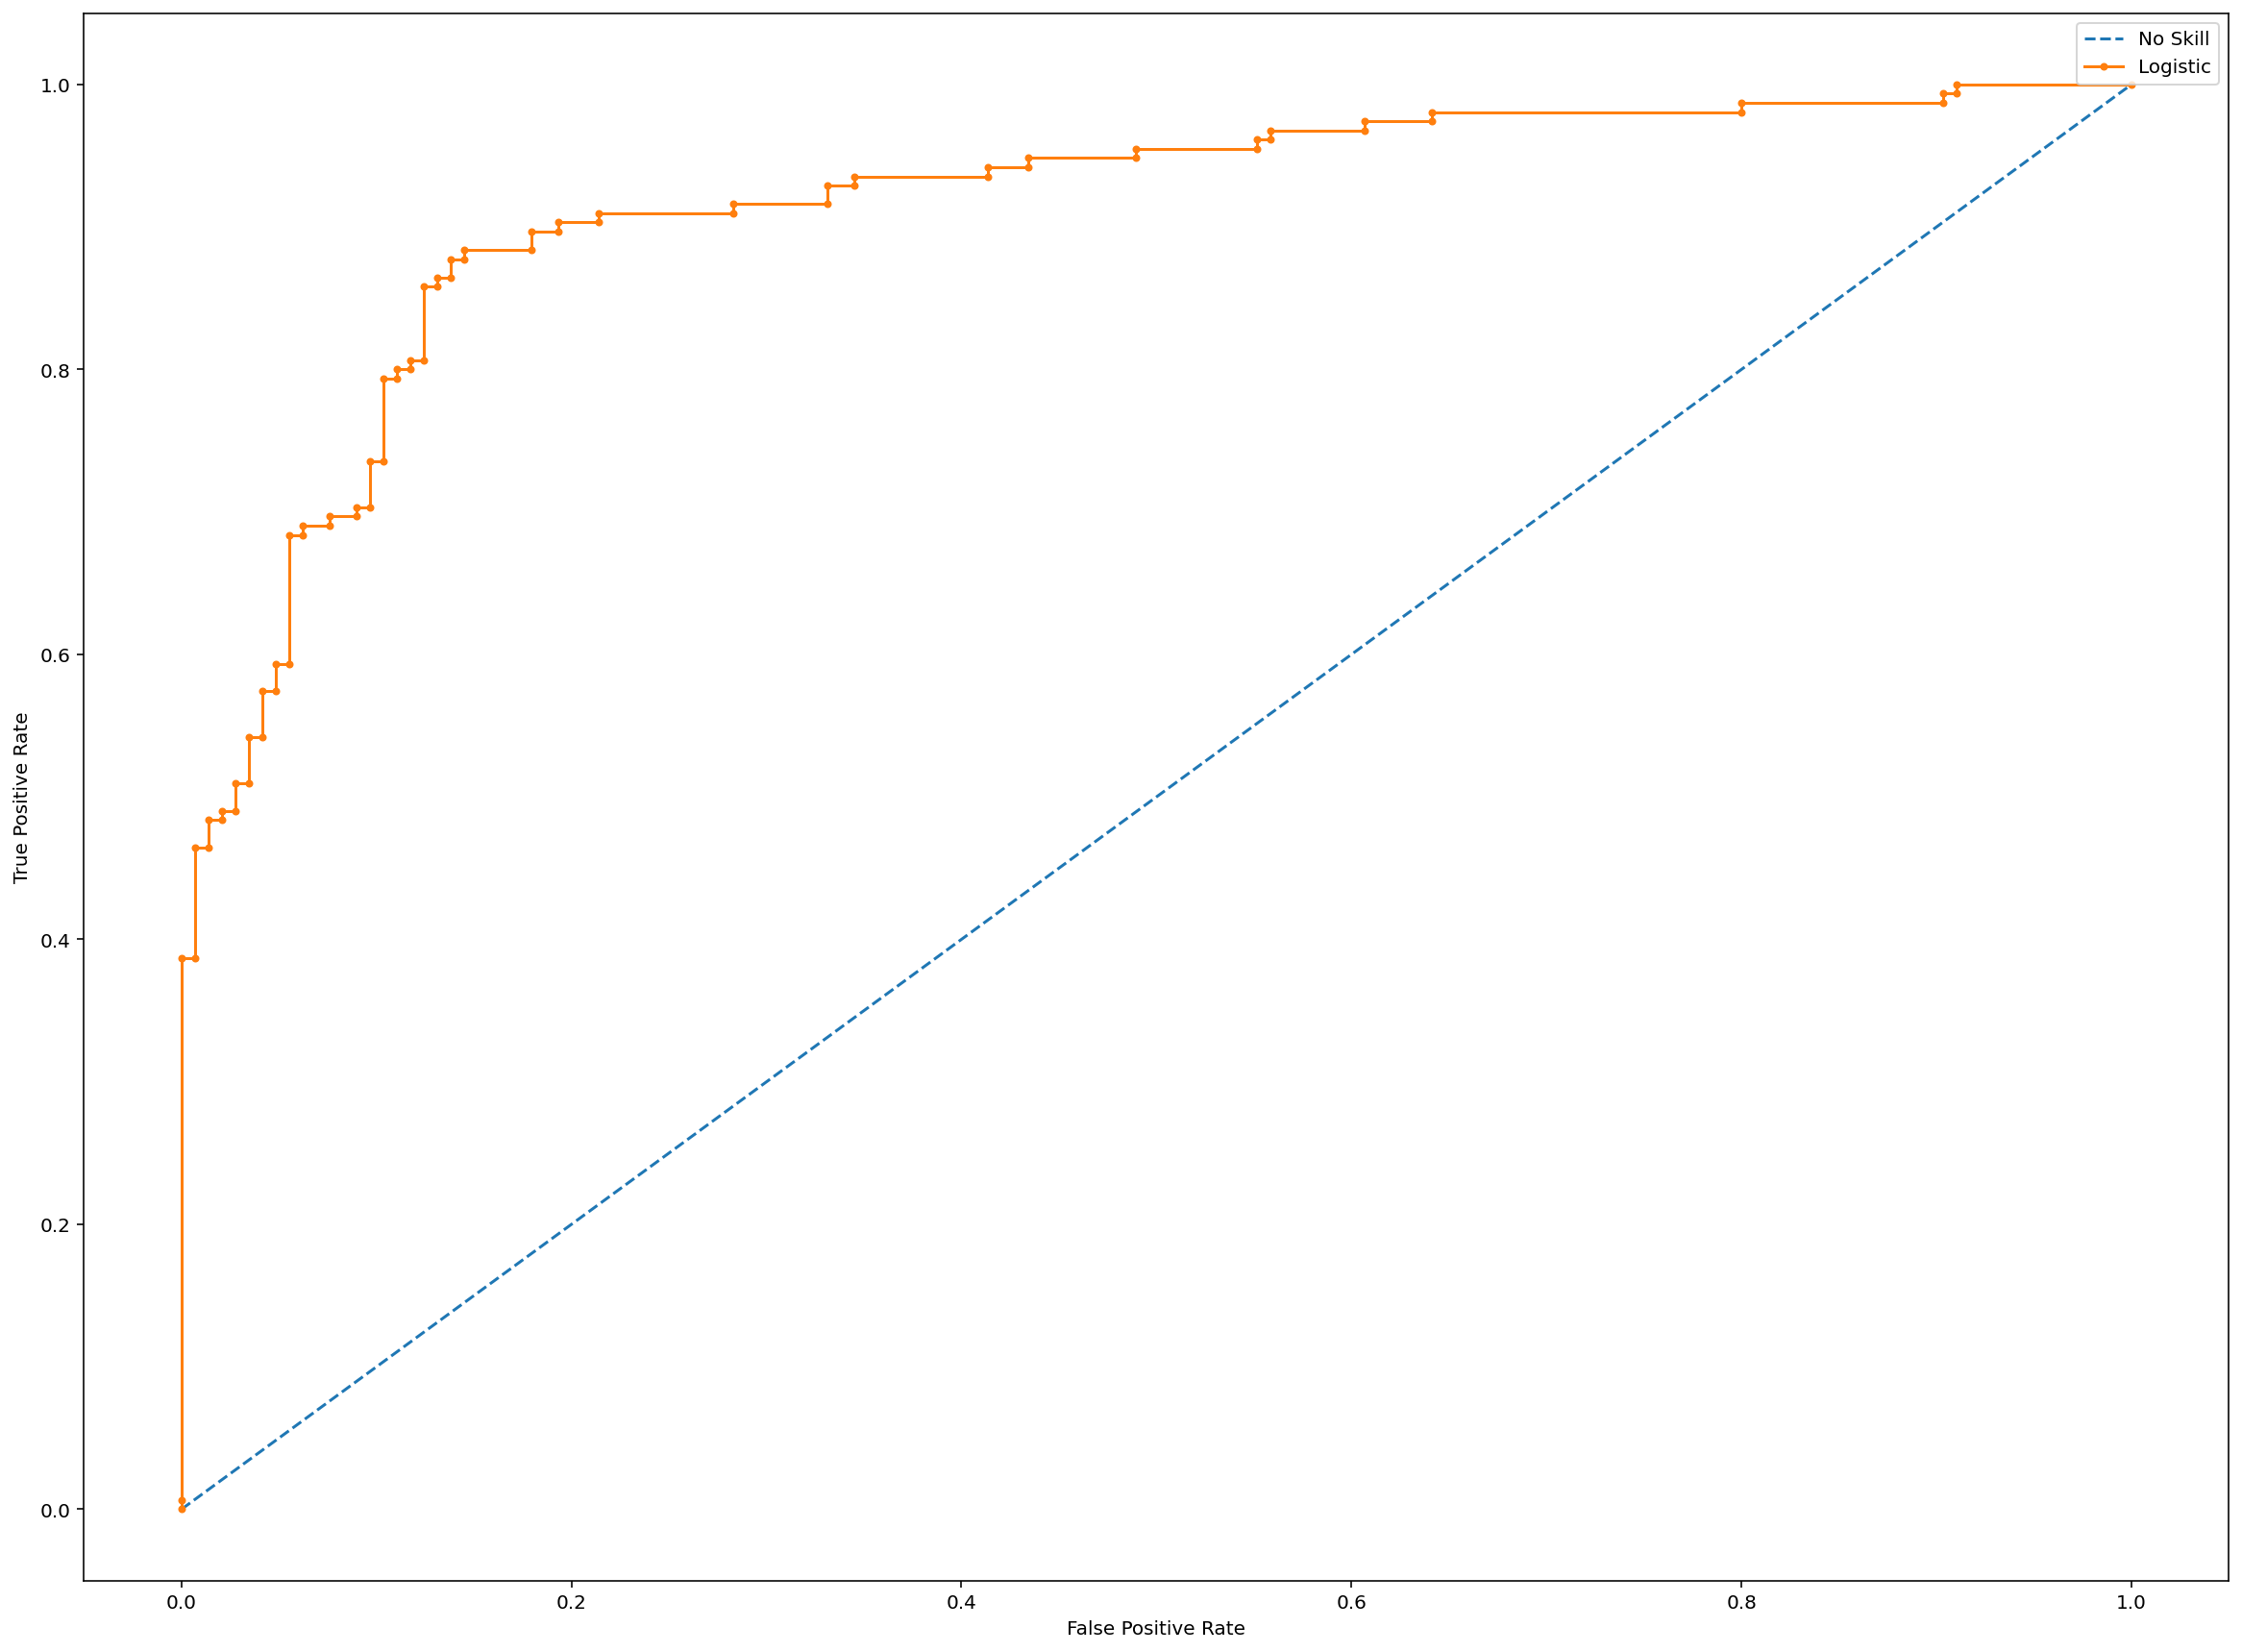

In [7]:
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

#### Precision-Recall curve example

We can evaluate on the same example the precision recall curve.

We need to make the class prediction out of the model by the `predict` method.

In [8]:
# predict class values
y_pred = model.predict(X_test)

We can now calculate precision and recall curve, together with $F_1$ score and the area under the curve.

In [9]:
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, y_pred), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))

Logistic: f1=0.850 auc=0.927


And finally make the plot.

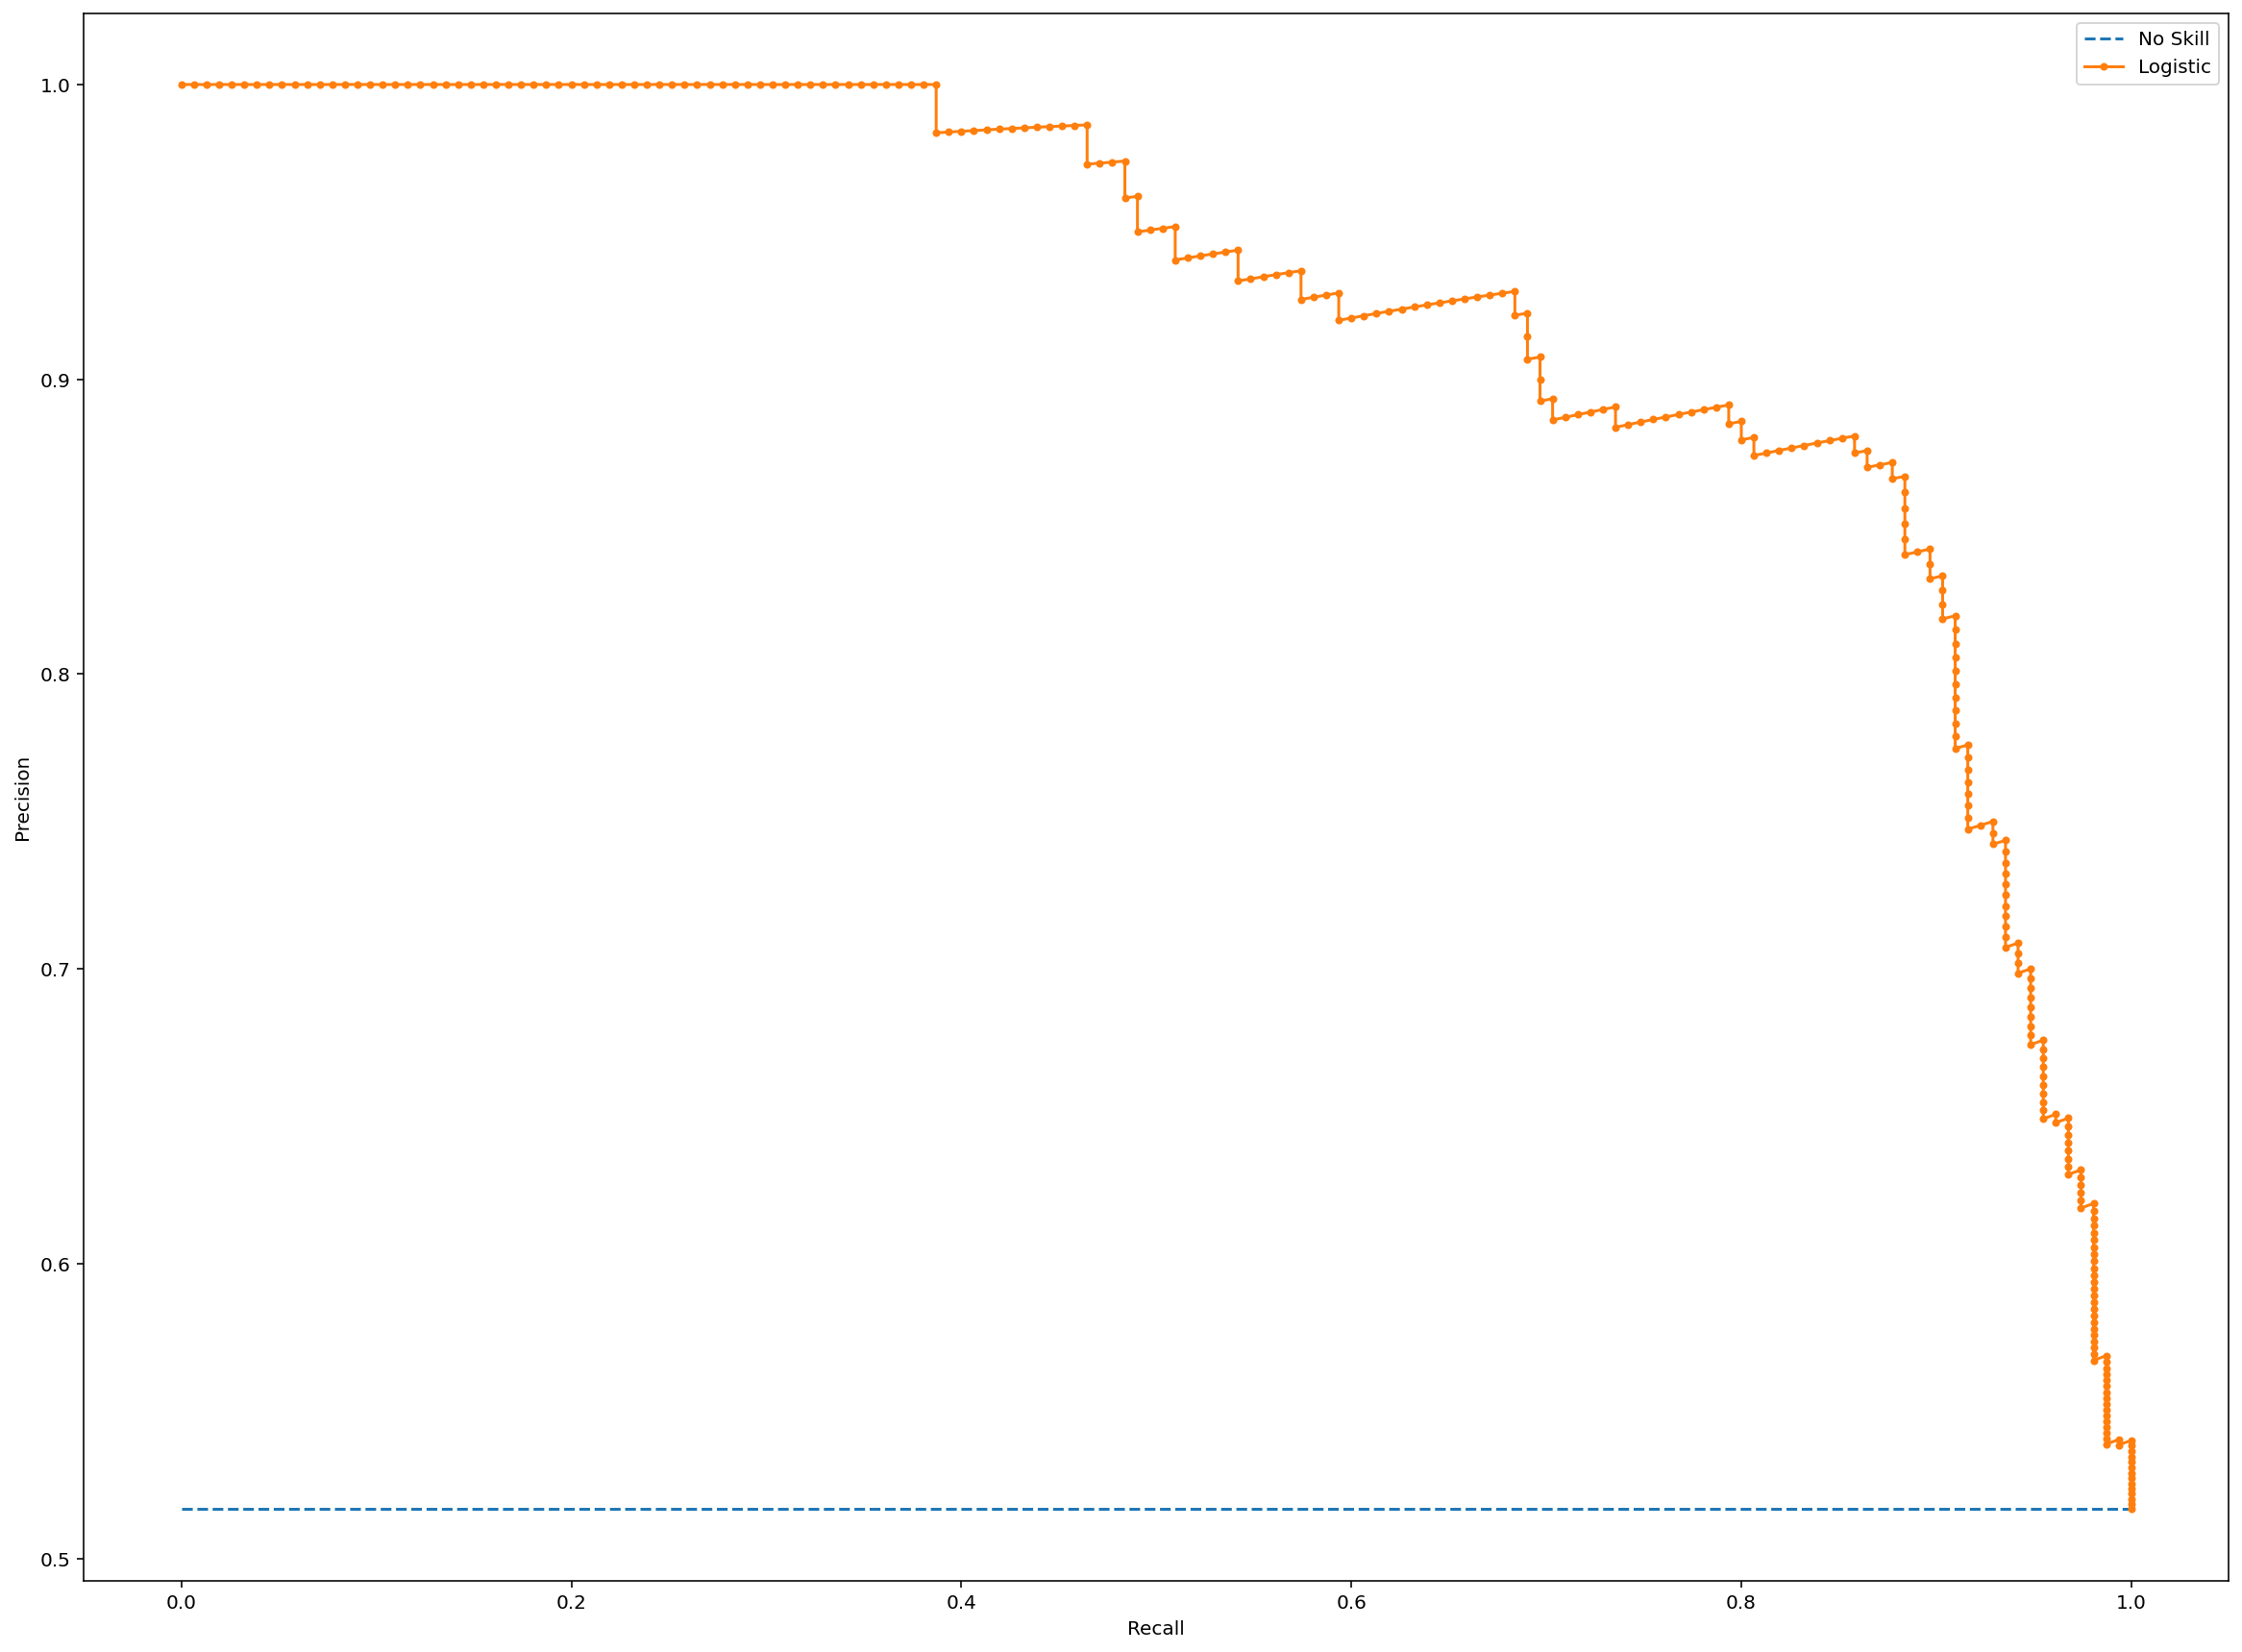

In [10]:
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

#### Classification report

There is a very useful tool when we have different and unbalanced classes. It is the `classification_report` in `sklearn`. 

Let's explore its use by an example.

In [11]:
# generate 4 class dataset
X, y = make_classification(n_samples=2000, n_classes=4, weights=[0.6, 0.2, 0.1, 0.1], n_redundant=0, n_clusters_per_class=1, random_state=42)
# split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [12]:
model = LogisticRegression()
model.fit(X_train, y_train);

Once the model has been trained, we can calculate the prediction on the test set.

In [13]:
y_pred = model.predict(X_test)

And the classification report over classes.

In [14]:
print(classification_report(y_pred=y_pred, y_true=y_test))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       357
           1       0.87      0.80      0.84       121
           2       0.74      0.38      0.51        60
           3       0.80      0.89      0.84        62

    accuracy                           0.85       600
   macro avg       0.82      0.75      0.77       600
weighted avg       0.85      0.85      0.84       600



__Question__: What can you say about scores and class weights?

### Confusion Matrix

Confusion matrix is nothing else than a matrix representing _true positives_, _true negatives_, _false positives_ and _false negatives_.

<p align="center">
    <img width="750" src="https://www.lebigdata.fr/wp-content/uploads/2018/12/confusion-matrix-exemple-1024x576.jpg">
</p>

This image shows that predicted labels are on the horizontal levels and actual labels are on the verticals levels.

Clearly understanding the structure of the confusion matrix is of utmost importance. Even though you can directly use the formula for most of the standard metrics like accuracy, precision, recall, etc. Many times you are required to compute the metrics like negative predictive value, false-positive rate, false-negative rate which are not available in the package out of the box.



In [23]:
confusion_matrix(y_test, y_pred, normalize='all')

array([[0.56166667, 0.01666667, 0.01166667, 0.005     ],
       [0.04      , 0.16166667, 0.        , 0.        ],
       [0.04333333, 0.        , 0.03833333, 0.01833333],
       [0.00333333, 0.00666667, 0.00166667, 0.09166667]])

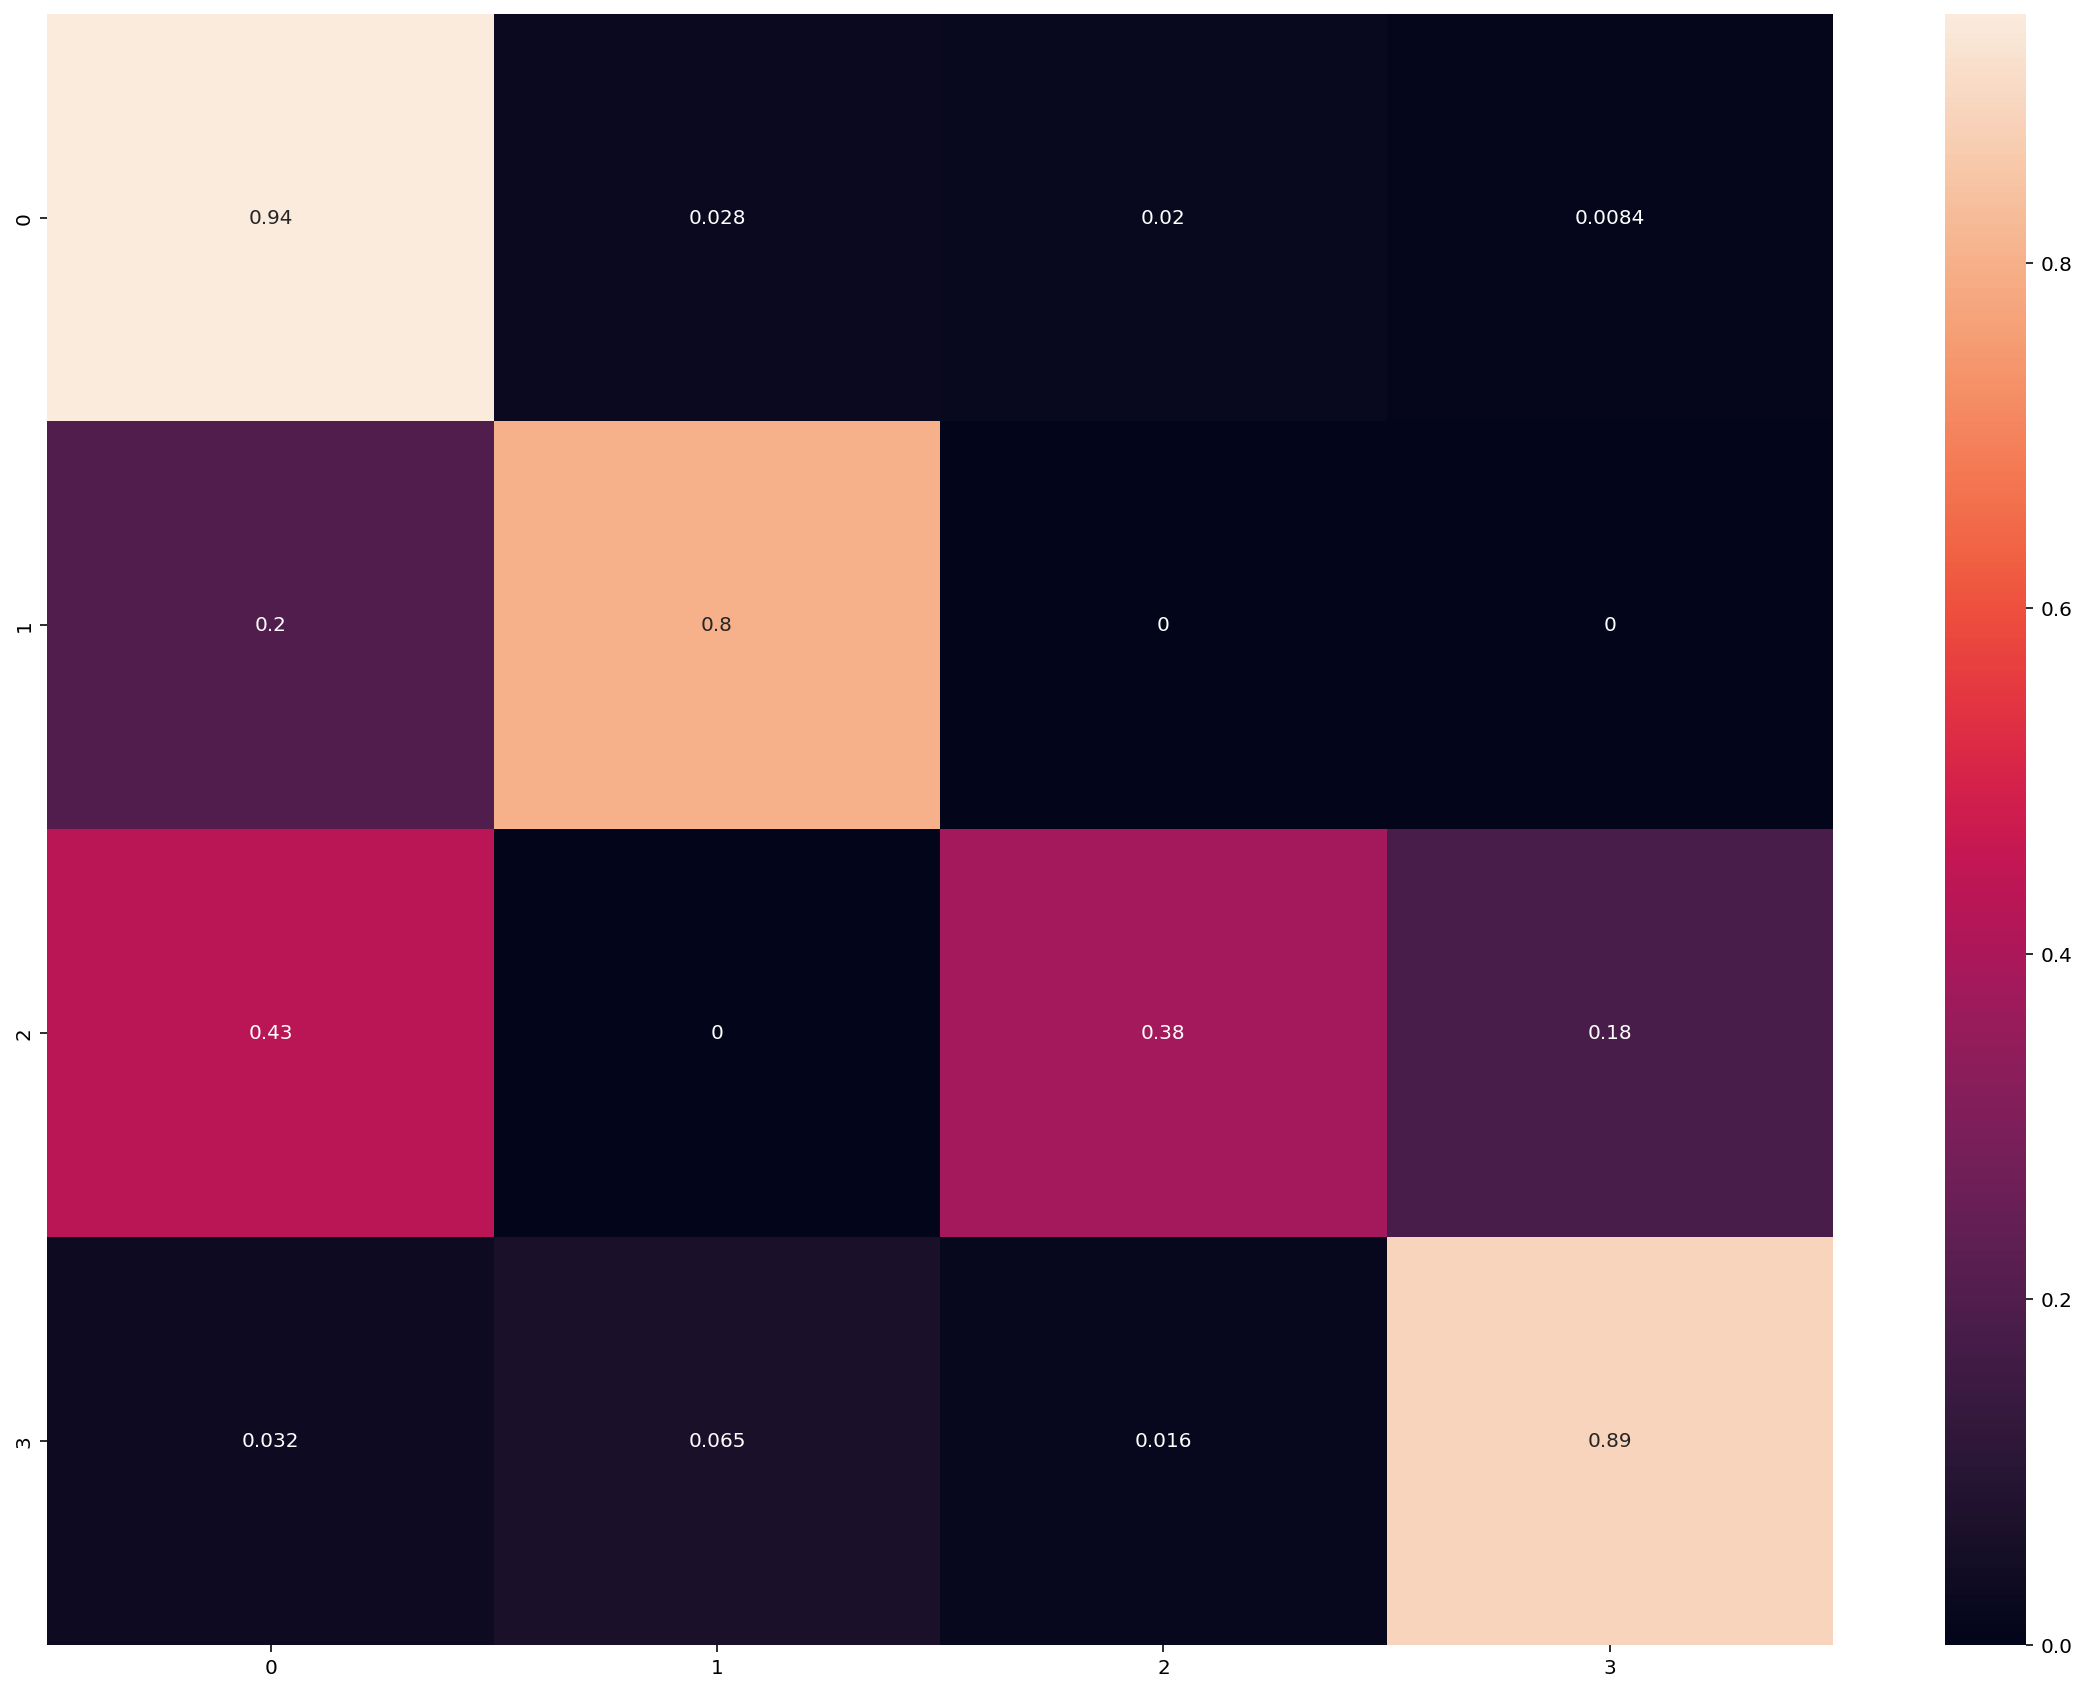

In [26]:
sns.heatmap(confusion_matrix(y_test, y_pred, normalize='true'), annot=True);

#### Exercise

Take the [breast cancer dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer). Build at least $3$ classifiers on it and write a report summarising all the metrics for the models you have built.

__Bonus__ make nice plots.

##### References

1. [ROC Graphs: Notes and Practical Considerations](http://www.blogspot.udec.ugto.saedsayad.com/docs/ROC101.pdf)
2. [The Precision-Recall Plot Is More Informative than the ROC Plot When Evaluating Binary Classifiers on Imbalanced Datasets](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4349800/)
3. [The relationship between Precision-Recall and ROC curves](https://dl.acm.org/doi/10.1145/1143844.1143874)
4. [A critical investigation of recall and precision as measures of retrieval system performance](https://dl.acm.org/doi/10.1145/65943.65945)